In [1]:
cells_meta_f = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor0/cloneMethod_variants_init_knn_resolution_3/clonalShift_method_clones/cells_meta.tsv"
indir = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/multiplex/clones_init/donor0"
outdir = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor0/cloneMethod_variants_init_knn_resolution_3/clonalShift_method_clones/single"
clone_order_f = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor0/cloneMethod_variants_init_knn_resolution_3/clonalShift_method_clones/clones_ranked/cloneID_rank_ncells.txt"

# cells_meta_f = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor0/cloneMethod_variants_init_knn_resolution_3/clonalShift_method_clones/cells_meta.tsv"
# outdir = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor0/cloneMethod_variants_init_knn_resolution_3/clonalShift_method_clones/single"
# clone_order_f = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor0/cloneMethod_variants_init_knn_resolution_3/clonalShift_method_clones/clones_ranked/cloneID_rank_ncells.txt"

ntop_clones = 10
af_thresh = 0.01
cov_thresh = 10
ntop_vars=10



In [2]:
from os.path import join, exists, dirname
from glob import glob
import pickle
import mplh.cluster_help as ch
import mplh.fig_utils as fu

import os
import vireoSNP
import numpy as np
from scipy import sparse
from scipy.io import mmread
import matplotlib.pyplot as plt
from scipy.stats import hypergeom
print(vireoSNP.__version__)

import pandas as pd
import seaborn as sns
from vireoSNP import Vireo
np.set_printoptions(formatter={'float': lambda x: format(x, '.5f')})

plt.rcParams['svg.fonttype'] = 'none'

fig_utils from mplh
0.5.6


In [3]:
import seaborn as sns
from mplh import cluster_help as ch
from src.utils.data_io import reverse_ids


In [4]:
clone_order = pd.read_csv(clone_order_f, header=None)[0].values
top_clones = clone_order[:ntop_clones]
top_clones

array(['0_49', '0_48', '0_47', '0_46', '0_44', '0_42', '0_33', '0_1',
       '0_0', '0_2'], dtype=object)

In [45]:
clone_order

array(['0_49', '0_48', '0_47', '0_46', '0_44', '0_42', '0_33', '0_1',
       '0_0', '0_2', '0_3', '0_6', '0_4', '0_7', '0_5', '0_9', '0_10',
       '0_8', '0_11', '0_12', '0_13', '0_14', '0_15', '0_17', '0_16',
       '0_18', '0_19', '0_21', '0_20', '0_23', '0_24', '0_22', '0_25',
       '0_26', '0_27', '0_28', '0_29', '0_32', '0_31', '0_30', '0_34',
       '0_37', '0_36', '0_35', '0_39', '0_38', '0_40', '0_41', '0_43',
       '0_45', '0_50'], dtype=object)

In [5]:
#af_indir = join(indir, "sc_af", f"donor{DONOR}")
af_indir = indir

AF_df = pd.read_csv(join(af_indir, "af.tsv"), index_col=0, sep="\t")
DP_df = pd.read_csv(join(af_indir, "dp.tsv"), index_col=0, sep="\t")


#out_f = join(outdir, f"donor{DONOR}")


In [6]:
#donor_vars = AF_df>0.9

In [7]:
cells_meta = pd.read_csv(cells_meta_f,sep="\t", index_col=0)
cells_meta = reverse_ids(cells_meta)
cells_meta

,cloneID,clusterID,condition,donor
AAACGAAAGCGAGAAA-1_Control,0_15,MPP/CMP/GMP C,Control,0
AAACGAAAGTACAGAT-1_Control,0_9,erythroid,Control,0
AAACGAACACTCGCAG-1_Control,0_21,neutrophil,Control,0
AAACGAATCAGGCGCT-1_Control,0_24,macrophage,Control,0
AAACGAATCCATCGAA-1_Control,0_13,MPP/CMP/GMP C,Control,0
...,...,...,...,...
TTTGTGTGTAGGGTCA-1_Input,0_43,MPP/CMP/GMP B,Input,0
TTTGTGTGTTTCTTAC-1_Input,0_6,MPP/CMP/GMP B,Input,0
TTTGTGTTCCTGAAAC-1_Input,0_11,MEP,Input,0
TTTGTGTTCGGGAAAC-1_Input,0_37,MPP/CMP/GMP B,Input,0


## Get donor-specific variants

number of donor vars: 28


/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


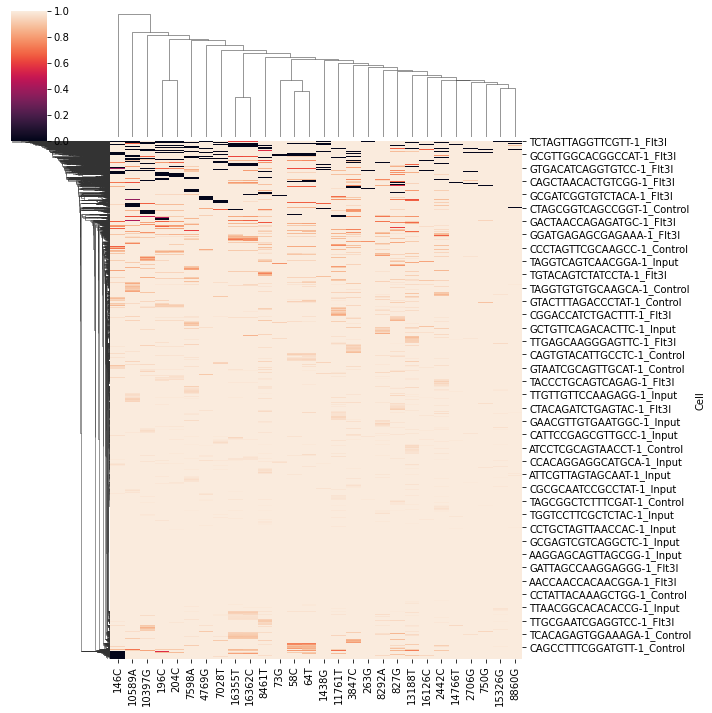

In [8]:
def get_high_variants(df, thresh, pct_thresh):
    """ Remove rows that have an average higher than threshold

    :param df:
    :param thresh:
    :return:
    """
    n_pct = pct_thresh*df.shape[0]
    return df.loc[:,((df>thresh).sum()>n_pct)].columns.values


donor_vars = get_high_variants(AF_df, thresh=0.8, pct_thresh=0.9)
print(f"number of donor vars: {len(donor_vars)}")

g = sns.clustermap(AF_df.loc[:, donor_vars])
g.fig.savefig(fname=join(outdir, f"donor_variants.pdf"))
#plt.savefig(join(outdir, "donor_vars.png"))

## Filter for clone

In [9]:
AF_df = AF_df.transpose()
DP_df = DP_df.transpose()

In [10]:
AF_df.head()

Cell,AAACGAAAGAATCAAC-1_Control,AAACGAAAGCGAGAAA-1_Control,AAACGAAAGTACAGAT-1_Control,AAACGAAAGTTAGCAA-1_Control,AAACGAACACTCGCAG-1_Control,AAACGAATCAGGCGCT-1_Control,AAACGAATCCATCGAA-1_Control,AAACGAATCTCGTAGA-1_Control,AAACTCGAGTGAAGGA-1_Control,AAACTCGCATGCACTA-1_Control,...,TTTGGTTTCTGATCCC-1_Input,TTTGTGTAGTTCGTTG-1_Input,TTTGTGTCACACATTG-1_Input,TTTGTGTGTAAGCCGA-1_Input,TTTGTGTGTAGATTAG-1_Input,TTTGTGTGTAGGGTCA-1_Input,TTTGTGTGTTTCTTAC-1_Input,TTTGTGTTCCTGAAAC-1_Input,TTTGTGTTCGGGAAAC-1_Input,TTTGTGTTCTGGCACG-1_Input
10397G,1.000000,1.0,0.0,0.8,1.0,1.0,1.0,1.0,1.000000,1.0,...,0.979798,1.000000,1.0,1.000000,1.000000,1.000000,1.0,0.978495,1.0,1.000000
10463C,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
10559G,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.062500,0.000000,0.000000,0.0,0.000000,0.0,0.000000
10589A,0.882353,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,...,1.000000,0.984848,1.0,0.970588,0.736842,0.966102,1.0,1.000000,1.0,1.000000
11251G,0.153846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.076923,0.0,...,0.000000,0.036145,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.023256


## Remove donor-specific variants

In [11]:
# Remove Donor variannts
AF_df = AF_df.loc[~(AF_df.index.isin(donor_vars))]
DP_df = DP_df.loc[AF_df.index, AF_df.columns] 

# Figure: 1: barplot for each clone, where x=Variant, and the % of cells (and raw) in the clone that has the variant and % of cells from other clone with variant


In [12]:
top_cells_meta = cells_meta[cells_meta["cloneID"].isin(top_clones)] 
top_cells_meta

,cloneID,clusterID,condition,donor
AAACTCGAGTGAAGGA-1_Control,0_0,monocyte,Control,0
AACAAAGTCAAGTTGC-1_Control,0_2,meg/erythroid,Control,0
AACAAAGTCCTCTCTT-1_Control,0_33,erythroid,Control,0
AACAGTCAGGACTTTC-1_Control,0_1,neutrophil B,Control,0
AACAGTCCAGAAGTGC-1_Control,0_0,macrophage,Control,0
...,...,...,...,...
TTTGAGGGTAAGTGCG-1_Input,0_0,MPP/CMP/GMP B,Input,0
TTTGCGCTCAGTTGAC-1_Input,0_0,MPP/CMP/GMP,Input,0
TTTGGTTAGGTAAGTT-1_Input,0_0,MPP/CMP/GMP B,Input,0
TTTGGTTTCATCATGG-1_Input,0_2,MPP/CMP/GMP B,Input,0


In [13]:
bin_AF_df = (AF_df > af_thresh) & (DP_df > cov_thresh)
bin_AF_df

Cell,AAACGAAAGAATCAAC-1_Control,AAACGAAAGCGAGAAA-1_Control,AAACGAAAGTACAGAT-1_Control,AAACGAAAGTTAGCAA-1_Control,AAACGAACACTCGCAG-1_Control,AAACGAATCAGGCGCT-1_Control,AAACGAATCCATCGAA-1_Control,AAACGAATCTCGTAGA-1_Control,AAACTCGAGTGAAGGA-1_Control,AAACTCGCATGCACTA-1_Control,...,TTTGGTTTCTGATCCC-1_Input,TTTGTGTAGTTCGTTG-1_Input,TTTGTGTCACACATTG-1_Input,TTTGTGTGTAAGCCGA-1_Input,TTTGTGTGTAGATTAG-1_Input,TTTGTGTGTAGGGTCA-1_Input,TTTGTGTGTTTCTTAC-1_Input,TTTGTGTTCCTGAAAC-1_Input,TTTGTGTTCGGGAAAC-1_Input,TTTGTGTTCTGGCACG-1_Input
10463C,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10559G,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
11251G,True,False,False,False,False,False,False,False,True,False,...,False,True,False,False,False,False,False,False,False,True
11453A,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11719A,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11812G,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13368A,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,True
14233G,False,False,False,False,False,False,False,True,False,False,...,True,True,True,False,False,False,False,True,True,False
14674C,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14905A,False,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False


## Create variant-clone (and non-clone) percent of cells in clone with variant

In [14]:
def calc_clone_pct(data, **kwargs):
    curr_AF_df = bin_AF_df.loc[:,data.index]
    other_curr_AF_df = bin_AF_df.loc[:, ~(bin_AF_df.columns.isin(data.index))]
    
    curr_AF_tot = curr_AF_df.sum(axis=1)
    curr_AF_pct = curr_AF_tot/curr_AF_df.shape[1]
    
    other_curr_AF_tot = other_curr_AF_df.sum(axis=1)
    other_curr_AF_pct = other_curr_AF_tot/other_curr_AF_df.shape[1]
        
    return pd.concat((pd.DataFrame(curr_AF_pct).rename({0:"clone_pct"}, axis=1),
               pd.DataFrame(other_curr_AF_pct).rename({0:"other_clone_pct"}, axis=1)),axis=1, 
             ignore_index=False).rename_axis("variant")
    

pct_clones_df = top_cells_meta.groupby("cloneID").apply(calc_clone_pct).reset_index()
pct_clones_df

,cloneID,variant,clone_pct,other_clone_pct
0,0_0,10463C,0.012376,0.040956
1,0_0,10559G,0.061881,0.052906
2,0_0,11251G,0.064356,0.067873
3,0_0,11453A,0.019802,0.025989
4,0_0,11719A,0.047030,0.080056
...,...,...,...,...
395,0_49,709A,0.000000,0.063658
396,0_49,8697A,0.000000,0.058112
397,0_49,8743A,0.000000,0.008318
398,0_49,930A,0.000000,0.054231


## Rank variants for each clone by sorting by mannwhitneyu test of allele-frequency


In [15]:
from scipy.stats import mannwhitneyu

In [31]:
def rank_unique_vars_clone_af(clone_cells):
    clones_af = AF_df.loc[:,clone_cells.index]
    other_clones_af = AF_df.loc[:, ~(AF_df.columns.isin(clone_cells.index))]
    pvals = mannwhitneyu(clones_af, other_clones_af, alternative='greater', axis=1).pvalue
    rankings = pd.DataFrame(index=clones_af.index,data=pvals).rank(method="min").rename({0:"rank"}, axis=1) # np.argsort(pvals)
    #print(type(rankings))
    #print('rankings', rankings)

    rankings["pval"] = pvals
    rankings["rank"]= rankings["rank"].astype('int')
    #print('rankings', rankings)
    #print('rankings', rankings.head())
    rankings.index.name = "variant"
    return rankings

pvals_df = cells_meta.groupby("cloneID").apply(rank_unique_vars_clone_af).reset_index()
pvals_df

,cloneID,variant,rank,pval
0,0_0,10463C,40,0.999622
1,0_0,10559G,8,0.476216
2,0_0,11251G,18,0.821374
3,0_0,11453A,12,0.699135
4,0_0,11719A,33,0.990840
...,...,...,...,...
2035,0_9,709A,34,0.999996
2036,0_9,8697A,21,0.999818
2037,0_9,8743A,6,0.846863
2038,0_9,930A,28,0.999977


In [32]:
pct_pvals_df = pd.merge(pct_clones_df, pvals_df, on=["cloneID", "variant"])
pct_pvals_df

,cloneID,variant,clone_pct,other_clone_pct,rank,pval
0,0_0,10463C,0.012376,0.040956,40,0.999622
1,0_0,10559G,0.061881,0.052906,8,0.476216
2,0_0,11251G,0.064356,0.067873,18,0.821374
3,0_0,11453A,0.019802,0.025989,12,0.699135
4,0_0,11719A,0.047030,0.080056,33,0.990840
...,...,...,...,...,...,...
395,0_49,709A,0.000000,0.063658,31,0.747940
396,0_49,8697A,0.000000,0.058112,5,0.137980
397,0_49,8743A,0.000000,0.008318,11,0.593499
398,0_49,930A,0.000000,0.054231,25,0.731707


In [33]:
def plot_pct_bar(data, **kwargs):
    ntop_vars = kwargs.get("ntop_vars", 0)
    data = data.set_index("variant")
    if ntop_vars != 0:
        data = data[data['rank']<ntop_vars].sort_values("rank")
        data[["clone_pct", "other_clone_pct"]].plot.bar(ax=plt.gca())
    else:
        data = data.loc[(data["clone_pct"]-data["other_clone_pct"]).sort_values()[::-1].index]
        #data = data.sort_values("clone_pct")[::-1]
        #print(data["clone_pct"]-data["other_clone_pct"])
        pd.DataFrame((data["clone_pct"]-data["other_clone_pct"])).plot.bar(ax=plt.gca())
    
    #plt.gca().legend(loc='best') 
    return

## Figure: Barplot of percent in clone vs percent not in clone

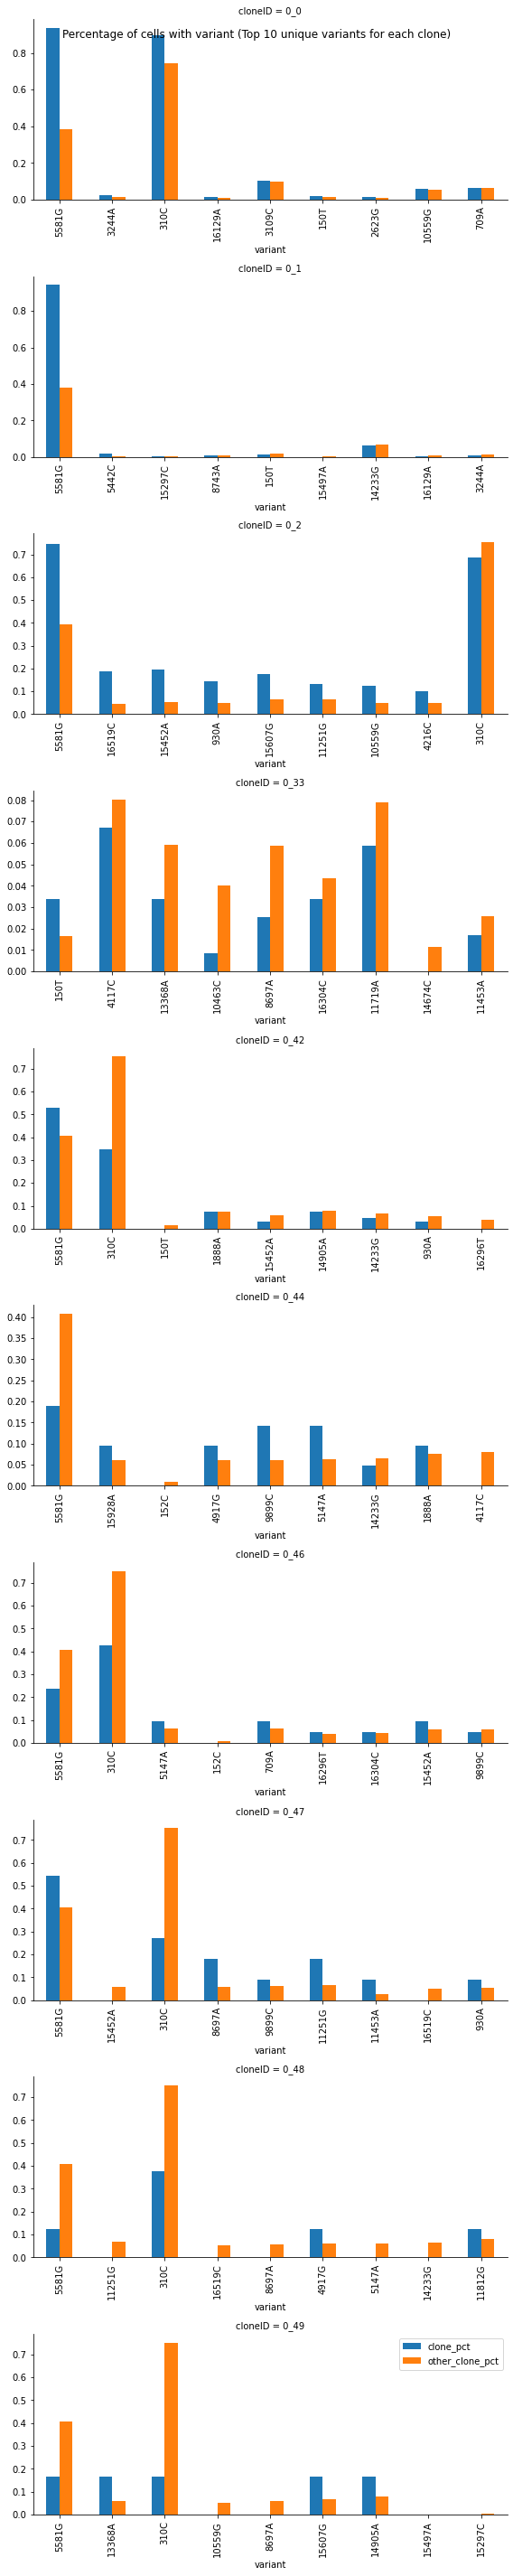

In [19]:
g = sns.FacetGrid(data=pct_pvals_df, col = "cloneID", col_wrap=1, height=4, aspect=2,
                 sharex=False, sharey=False)
g.map_dataframe(plot_pct_bar, ntop_vars=ntop_vars)
g.fig.suptitle("Percentage of cells with variant (Top 10 unique variants for each clone)")
g.fig.savefig(fname=join(outdir, f"top_variants_distinct_pct_vs_other.pdf"), dpi=500, bbox_inches='tight', pad_inches=0.5)
g.fig.savefig(fname=join(outdir, f"top_variants_distinct_pct_vs_other.svg"), dpi=500, bbox_inches='tight', pad_inches=0.5)

plt.tight_layout()
plt.legend()

## Figure: Barplot of percent in clone - percent not in clone. Showing for all variants

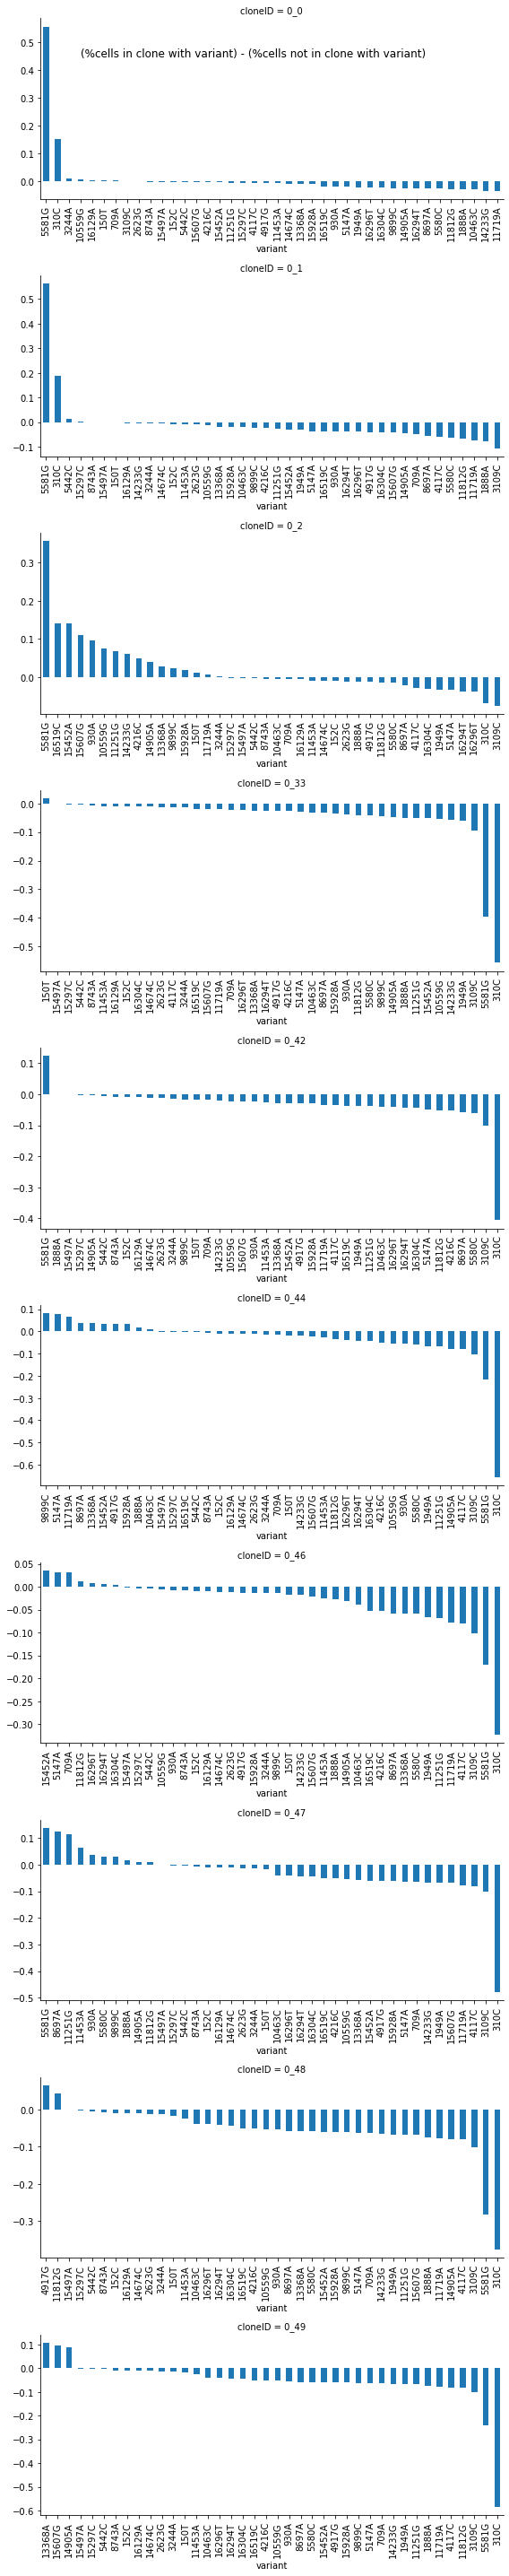

In [20]:
g = sns.FacetGrid(data=pct_clones_df, col = "cloneID", col_wrap=1, height=4, aspect=2,
                 sharex=False, sharey=False)
g.map_dataframe(plot_pct_bar)
g.fig.suptitle("(%cells in clone with variant) - (%cells not in clone with variant) ")
g.fig.savefig(fname=join(outdir, f"top_variants_pct_minus_other.pdf"), dpi=500, bbox_inches='tight', pad_inches=0.5)
g.fig.savefig(fname=join(outdir, f"top_variants_pct_minus_other.svg"), dpi=500, bbox_inches='tight', pad_inches=0.5)

In [43]:
def plot_violin(data, **kwargs):
    ntop_vars = kwargs.get("ntop_vars", 0)
    curr_clone = data["cloneID"].values[0]
    print('curr_clone', curr_clone)
    curr_AF_df = AF_df.loc[:,data.index]
    other_curr_AF_df = AF_df.loc[:, ~(AF_df.columns.isin(data.index))]
    
    curr_AF_df = curr_AF_df.reset_index().melt(id_vars='index', var_name="cell", value_name="AF")
    curr_AF_df["type"] = "clone"
    
    other_curr_AF_df = other_curr_AF_df.reset_index().melt(id_vars='index', var_name="cell", value_name="AF")
    other_curr_AF_df["type"] = "other"
    curr_merge_df = pd.concat((curr_AF_df, other_curr_AF_df), axis=0)
    curr_merge_df = curr_merge_df.rename({"index":"variant"}, axis=1)
    print(curr_merge_df.head())
    if ntop_vars != 0:
        print(pct_pvals_df[(pct_pvals_df["cloneID"]==curr_clone)])
        if pct_pvals_df[(pct_pvals_df["cloneID"]==curr_clone)].shape[0] == 0:
            return
        curr_top_vars = pct_pvals_df[(pct_pvals_df["cloneID"]==curr_clone) & (pct_pvals_df["rank"]<=ntop_vars)].sort_values("rank")["variant"].values
        print('top vars', curr_top_vars)
        #print('before top vars',curr_merge_df.shape)
        curr_merge_df = curr_merge_df[curr_merge_df["variant"].isin(curr_top_vars)] #data[data['rank']<ntop_vars].sort_values("rank")
        #print('after top vars',curr_merge_df.shape)
        
    sns.boxenplot(data=curr_merge_df, x="variant", y="AF", hue="type", ax=plt.gca())
    return 
    

## Violin plots for Allele frequency

curr_clone 0_15
  variant                        cell   AF   type
0  10463C  AAACGAAAGCGAGAAA-1_Control  0.0  clone
1  10559G  AAACGAAAGCGAGAAA-1_Control  0.0  clone
2  11251G  AAACGAAAGCGAGAAA-1_Control  0.0  clone
3  11453A  AAACGAAAGCGAGAAA-1_Control  0.0  clone
4  11719A  AAACGAAAGCGAGAAA-1_Control  0.0  clone
Empty DataFrame
Columns: [cloneID, variant, clone_pct, other_clone_pct, rank, pval]
Index: []
curr_clone 0_9
  variant                        cell   AF   type
0  10463C  AAACGAAAGTACAGAT-1_Control  0.0  clone
1  10559G  AAACGAAAGTACAGAT-1_Control  0.0  clone
2  11251G  AAACGAAAGTACAGAT-1_Control  0.0  clone
3  11453A  AAACGAAAGTACAGAT-1_Control  0.0  clone
4  11719A  AAACGAAAGTACAGAT-1_Control  0.0  clone
Empty DataFrame
Columns: [cloneID, variant, clone_pct, other_clone_pct, rank, pval]
Index: []
curr_clone 0_21
  variant                        cell   AF   type
0  10463C  AAACGAACACTCGCAG-1_Control  0.0  clone
1  10559G  AAACGAACACTCGCAG-1_Control  0.0  clone
2  11251G  AAAC

  variant                        cell   AF   type
0  10463C  AAAGATGGTCAACAGG-1_Control  0.0  clone
1  10559G  AAAGATGGTCAACAGG-1_Control  0.0  clone
2  11251G  AAAGATGGTCAACAGG-1_Control  0.0  clone
3  11453A  AAAGATGGTCAACAGG-1_Control  0.0  clone
4  11719A  AAAGATGGTCAACAGG-1_Control  0.0  clone
Empty DataFrame
Columns: [cloneID, variant, clone_pct, other_clone_pct, rank, pval]
Index: []
curr_clone 0_29
  variant                        cell   AF   type
0  10463C  AAAGGATAGAATACTG-1_Control  0.0  clone
1  10559G  AAAGGATAGAATACTG-1_Control  0.0  clone
2  11251G  AAAGGATAGAATACTG-1_Control  0.0  clone
3  11453A  AAAGGATAGAATACTG-1_Control  0.0  clone
4  11719A  AAAGGATAGAATACTG-1_Control  0.0  clone
Empty DataFrame
Columns: [cloneID, variant, clone_pct, other_clone_pct, rank, pval]
Index: []
curr_clone 0_35
  variant                        cell   AF   type
0  10463C  AAAGGATGTGGAGTGT-1_Control  0.0  clone
1  10559G  AAAGGATGTGGAGTGT-1_Control  0.0  clone
2  11251G  AAAGGATGTGGAGTGT-1_

curr_clone 0_1
  variant                        cell   AF   type
0  10463C  AACAGTCAGGACTTTC-1_Control  0.0  clone
1  10559G  AACAGTCAGGACTTTC-1_Control  0.0  clone
2  11251G  AACAGTCAGGACTTTC-1_Control  0.0  clone
3  11453A  AACAGTCAGGACTTTC-1_Control  0.0  clone
4  11719A  AACAGTCAGGACTTTC-1_Control  0.0  clone
   cloneID variant  clone_pct  other_clone_pct  rank           pval
40     0_1  10463C   0.019512         0.040636    19   9.968356e-01
41     0_1  10559G   0.041463         0.053872    12   9.581641e-01
42     0_1  11251G   0.041463         0.068966    20   9.970518e-01
43     0_1  11453A   0.017073         0.026123    11   9.310388e-01
44     0_1  11719A   0.007317         0.081969    37   1.000000e+00
45     0_1  11812G   0.017073         0.085336    36   9.999999e-01
46     0_1  13368A   0.041463         0.059793    16   9.824350e-01
47     0_1  14233G   0.060976         0.066063     7   8.404677e-01
48     0_1  14674C   0.004878         0.011610    10   9.263162e-01
49   

  variant                        cell   AF   type
0  10463C  AAGGAGCCAACTGCGC-1_Control  0.0  clone
1  10559G  AAGGAGCCAACTGCGC-1_Control  0.0  clone
2  11251G  AAGGAGCCAACTGCGC-1_Control  0.0  clone
3  11453A  AAGGAGCCAACTGCGC-1_Control  0.0  clone
4  11719A  AAGGAGCCAACTGCGC-1_Control  0.0  clone
Empty DataFrame
Columns: [cloneID, variant, clone_pct, other_clone_pct, rank, pval]
Index: []
curr_clone 0_40
  variant                        cell        AF   type
0  10463C  AAGGAGCGTGGCGCTT-1_Control  0.173913  clone
1  10559G  AAGGAGCGTGGCGCTT-1_Control  0.000000  clone
2  11251G  AAGGAGCGTGGCGCTT-1_Control  0.000000  clone
3  11453A  AAGGAGCGTGGCGCTT-1_Control  0.000000  clone
4  11719A  AAGGAGCGTGGCGCTT-1_Control  0.000000  clone
Empty DataFrame
Columns: [cloneID, variant, clone_pct, other_clone_pct, rank, pval]
Index: []
curr_clone 0_38
  variant                        cell   AF   type
0  10463C  AAGGAGCGTTAGGCTT-1_Control  0.0  clone
1  10559G  AAGGAGCGTTAGGCTT-1_Control  0.0  clone


top vars ['5581G' '15928A' '152C' '4917G' '9899C' '5147A' '14233G' '1888A' '4117C'
 '11719A']
curr_clone 0_46
  variant                        cell   AF   type
0  10463C  ACCGCAGAGGCAAGGG-1_Control  0.0  clone
1  10559G  ACCGCAGAGGCAAGGG-1_Control  0.0  clone
2  11251G  ACCGCAGAGGCAAGGG-1_Control  0.0  clone
3  11453A  ACCGCAGAGGCAAGGG-1_Control  0.0  clone
4  11719A  ACCGCAGAGGCAAGGG-1_Control  0.0  clone
    cloneID variant  clone_pct  other_clone_pct  rank          pval
240    0_46  10463C   0.000000         0.039769    30  8.448640e-01
241    0_46  10559G   0.047619         0.053321    15  5.768121e-01
242    0_46  11251G   0.000000         0.067874    37  9.037644e-01
243    0_46  11453A   0.000000         0.025772    29  7.843969e-01
244    0_46  11719A   0.000000         0.078760    38  9.196161e-01
245    0_46  11812G   0.095238         0.082204    11  4.168887e-01
246    0_46  13368A   0.000000         0.059098    34  8.879927e-01
247    0_46  14233G   0.047619         0.06587

curr_clone 0_49
  variant                        cell   AF   type
0  10463C  TTTGAGGAGAATCAGT-1_Control  0.0  clone
1  10559G  TTTGAGGAGAATCAGT-1_Control  0.0  clone
2  11251G  TTTGAGGAGAATCAGT-1_Control  0.0  clone
3  11453A  TTTGAGGAGAATCAGT-1_Control  0.0  clone
4  11719A  TTTGAGGAGAATCAGT-1_Control  0.0  clone
    cloneID variant  clone_pct  other_clone_pct  rank      pval
360    0_49  10463C   0.000000         0.039703    20  0.706110
361    0_49  10559G   0.000000         0.053344     4  0.117111
362    0_49  11251G   0.000000         0.067761    35  0.756844
363    0_49  11453A   0.000000         0.025729    18  0.662970
364    0_49  11719A   0.000000         0.078629    37  0.773118
365    0_49  11812G   0.000000         0.082289    39  0.777201
366    0_49  13368A   0.166667         0.058889     2  0.002375
367    0_49  14233G   0.000000         0.065876    33  0.751734
368    0_49  14674C   0.000000         0.011312    14  0.609325
369    0_49  14905A   0.166667         0.079

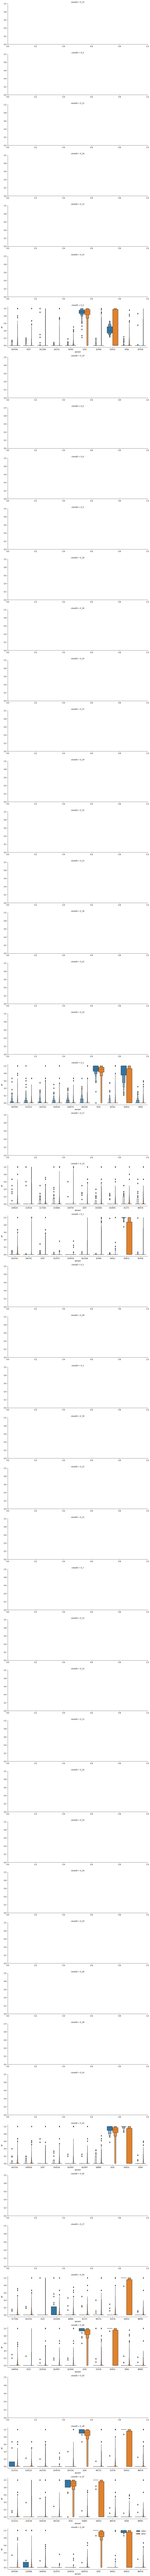

In [44]:
g = sns.FacetGrid(data=cells_meta, col="cloneID", col_order=top_clones, col_wrap=1, height=4, aspect=2, sharex=False, sharey=False)
g.map_dataframe(plot_violin, ntop_vars=10 )
plt.legend(loc='upper right')
g.fig.savefig(fname=join(outdir, f"top_variants_in_clone_af_boxen.pdf"), dpi=500, bbox_inches='tight', pad_inches=0.5)
g.fig.savefig(fname=join(outdir, f"top_variants_in_clone_af_boxen.svg"), dpi=500, bbox_inches='tight', pad_inches=0.5)


# Plot variants as row and clone as x AF violin

In [46]:
def long_af(ser, cells_meta):
    v = ser.name
    cells_meta["Variant"] = v
    #print('ser', pd.DataFrame(ser))
    cells_meta  = pd.merge(pd.DataFrame(ser).rename({v:"af"}, axis=1), 
             cells_meta, left_index=True, right_index=True, how='inner' )
    #cells_meta.loc[ser.index, "AF"] = ser
    return cells_meta
    
long_af = AF_df.apply(long_af, cells_meta=cells_meta, axis=1)
long_af = pd.concat(long_af.values, axis=0)

v 10463C
v 10559G
v 11251G
v 11453A
v 11719A
v 11812G
v 13368A
v 14233G
v 14674C
v 14905A
v 150T
v 15297C
v 152C
v 15452A
v 15497A
v 15607G
v 15928A
v 16129A
v 16294T
v 16296T
v 16304C
v 16519C
v 1888A
v 1949A
v 2623G
v 3109C
v 310C
v 3244A
v 4117C
v 4216C
v 4917G
v 5147A
v 5442C
v 5580C
v 5581G
v 709A
v 8697A
v 8743A
v 930A
v 9899C


In [61]:
vars_min_over_median = pct_pvals_df.groupby("variant").apply(lambda x: min(x['rank']+1)/np.median(x['rank']+1))
vars_min_over_median = vars_min_over_median.sort_values()
vars_order = vars_min_over_median.index
vars_min_over_median


variant
4117C     0.088235
11251G    0.111111
16519C    0.115385
150T      0.117647
3244A     0.130435
5147A     0.142857
3109C     0.146341
15928A    0.146341
5442C     0.166667
1888A     0.166667
13368A    0.181818
15452A    0.200000
930A      0.204082
10463C    0.204082
8697A     0.217391
11719A    0.222222
15297C    0.228571
152C      0.235294
16129A    0.263158
4917G     0.277778
8743A     0.285714
16304C    0.291667
709A      0.292683
10559G    0.294118
16296T    0.311111
2623G     0.313725
15607G    0.342857
5580C     0.349206
14674C    0.375000
9899C     0.375000
4216C     0.391304
11453A    0.400000
16294T    0.415094
14905A    0.424242
15497A    0.437500
11812G    0.444444
14233G    0.500000
1949A     0.611111
310C      0.750000
5581G     1.000000
dtype: float64

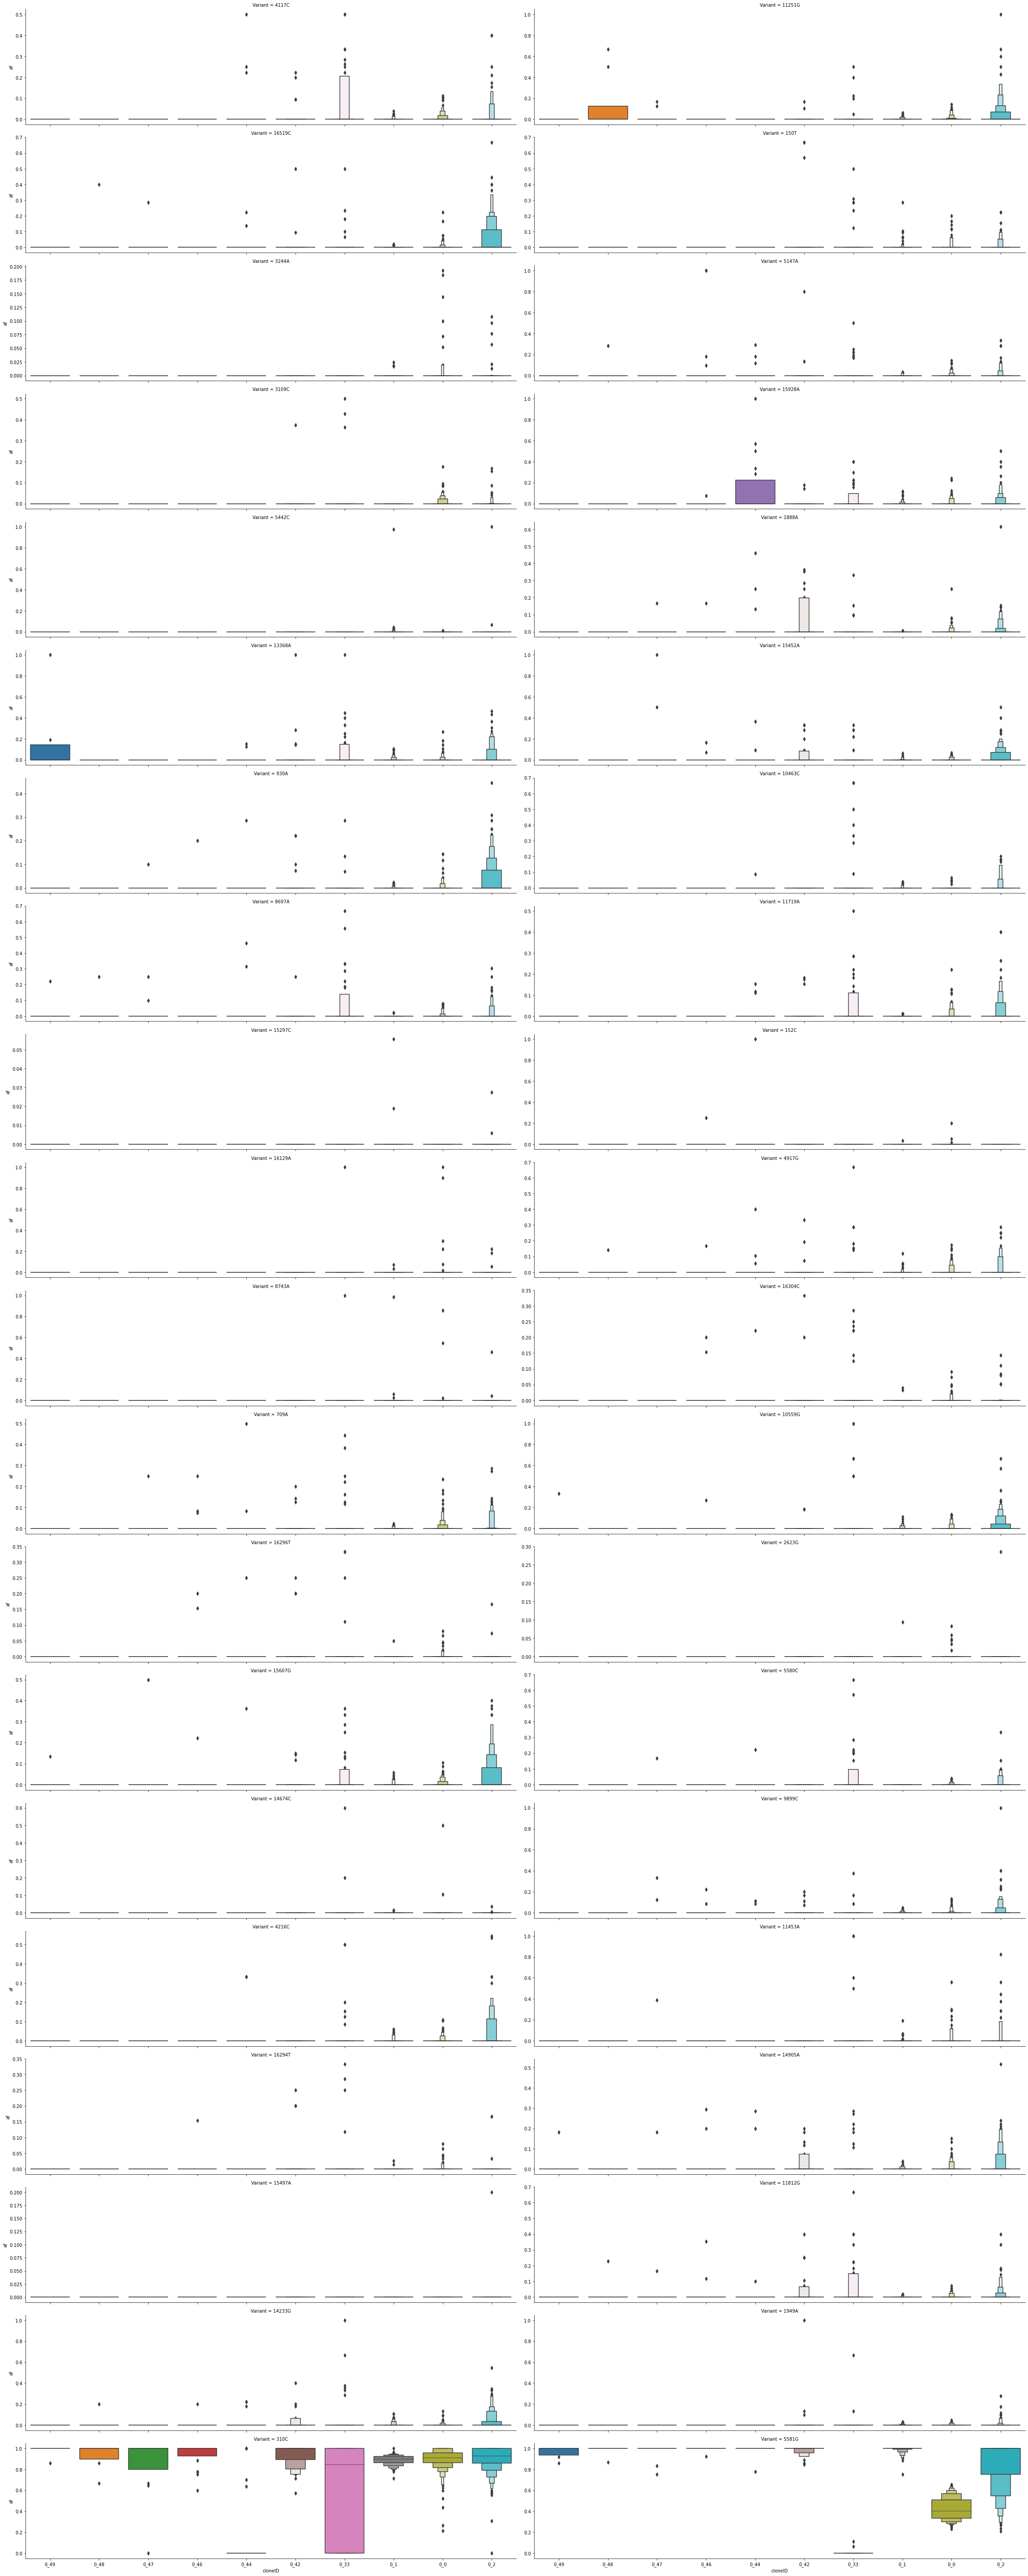

In [62]:
g = sns.catplot(data=long_af, x="cloneID", y="af", col="Variant", col_wrap=2, kind='boxen', 
            sharey=False, col_order=vars_order,
            height=4, aspect=2, order=top_clones)
#g.fig.savefig(fname=join(outdir, f"top_variants_af.pdf"), dpi=500, bbox_inches='tight', pad_inches=0.5)
g.fig.savefig(fname=join(outdir, f"top_variants_af.svg"), dpi=500, bbox_inches='tight', pad_inches=0.5)

## Overlapping variants across clones